In [8]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn.gaussian_process as skg

import bokeh.io 
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from bokeh.transform import linear_cmap
from bokeh.models import LinearColorMapper
bokeh.io.output_notebook()

Loading BokehJS ...

In [38]:
def f(x):
    return 0.8-0.2*x**2

In [65]:
xx = np.arange(-5,5,0.01).reshape(-1,1)
y = f(xx)

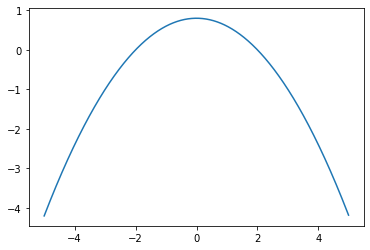

In [66]:
plt.plot(xx,y)
plt.show()

In [104]:
gpa = skg.GaussianProcessRegressor(alpha=1e-2)
X = np.random.random([3,1])*10-5
y = f(X)
gpa.fit(X,y)

GaussianProcessRegressor(alpha=0.01)

In [105]:
mu,sig = gpa.predict(xx, return_std=True)
mu=np.ravel(mu)
sig = np.ravel(sig)

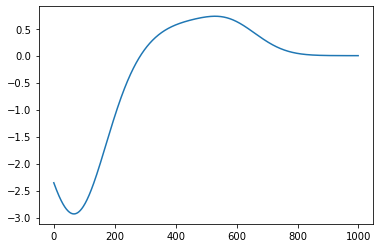

In [106]:
plt.plot(mu)
plt.show()

In [107]:
p = figure(
    x_range=[-5,5],
    y_range=[0,1],
    plot_width=400,
    plot_height=300,
    x_axis_label="Number of Samples",
    y_axis_label="Error Rate"
)

x1 = np.ravel(xx)
x2 = x1[::-1]
y1=mu+sig
y2=(mu-sig)[::-1]
x = np.hstack((x1, x2))
y = np.hstack((y1, y2))

p.line(
    x=x1,
    y=mu,
    line_width=3,
)

p.patch(
    x=x,
    y=y,
    alpha=0.5
)
show(p)

In [108]:
gpa2=skg.GaussianProcessRegressor()
X2 = np.vstack((X,[[-3]]))
y2 = f(X2)
gpa2.fit(X2,y2)

GaussianProcessRegressor()

In [109]:
mu2,sig2 = gpa2.predict(xx, return_std=True)

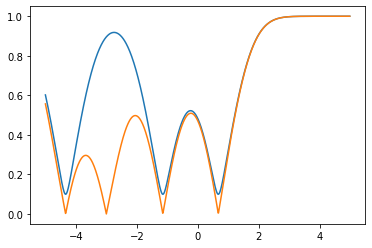

In [110]:
plt.plot(xx,sig)
plt.plot(xx,sig2)